# Comparing observed crime and theoretical

Notebook by Lauren Liao

Goal: To examine if the observed crime data has the same distribution as the theoretical

In [1]:
# imports
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
%matplotlib inline
import pprint as pp
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

In [17]:
# method to help label values inside graph
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

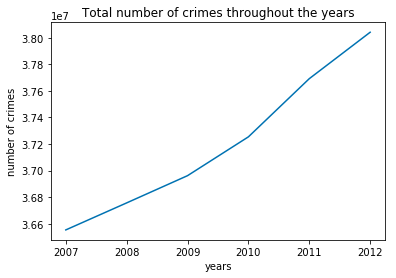

In [4]:
ca_state_crime = [36553215, 36756666, 36961664, 37253956, 37691912, 38041430] # from fbi
#https://ucr.fbi.gov/
plt.plot(np.arange(2007,2013), ca_state_crime)
plt.xlabel('years')
plt.ylabel('number of crimes')
plt.title('Total number of crimes throughout the years')

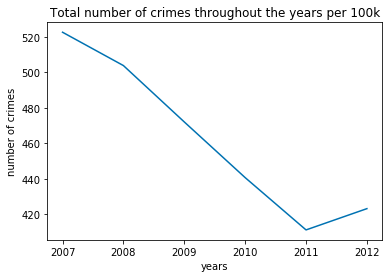

In [6]:
ca_crime_per100k = [522.6, 503.8, 472.0, 440.6, 411.1, 423.1]
plt.plot(np.arange(2007,2013), ca_crime_per100k)
plt.xlabel('years')
plt.ylabel('number of crimes')
plt.title('Total number of crimes throughout the years per 100k')

[29.759999999999998, 30.19, 30.54, 31.05, 31.419999999999998, 31.83]

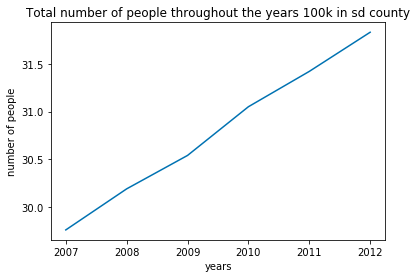

In [15]:
sd_pop_million = [2.976,3.019,3.054,3.105,3.142, 3.183]
sd_pop_100k = [x*10 for x in sd_pop_million]
plt.plot(np.arange(2007,2013), sd_pop_100k)
plt.xlabel('years')
plt.ylabel('number of people')
plt.title('Total number of people throughout the years 100k in sd county')
sd_pop_100k

Looks like it went up!? but we also have more people!
Lets look at crime per 100,000 inhabitants	

In [8]:
theo_crime = []
for i in np.arange(6):
    theo_crime.append(ca_crime_per100k [i]*sd_pop_100k[i])

In [9]:
theo_crime

[15552.576,
 15209.722000000002,
 14414.88,
 13680.630000000001,
 12916.762,
 13467.273]

In [10]:
sdcity_pop_million = [1.298,1.306,1.306,1.306,1.321, 1.34]
sdcity_pop_100k = [x*10 for x in sdcity_pop_million]
print(sdcity_pop_100k)
theo_crime_city = []
for i in np.arange(6):
    theo_crime_city.append(ca_crime_per100k [i]*sdcity_pop_100k[i])

[12.98, 13.06, 13.06, 13.06, 13.209999999999999, 13.4]


In [11]:
theo_crime_city

[6783.348000000001,
 6579.628000000001,
 6164.320000000001,
 5754.236000000001,
 5430.631,
 5669.540000000001]

In [12]:
crime_city = [7797.0, 7619.0, 6624.0, 6180.0, 5664.0, 5611.0] #sd city

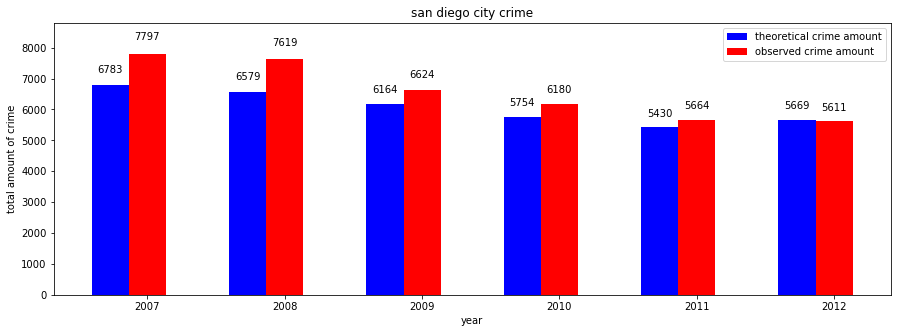

In [18]:
# Create multi bar graph to display information compare 2007 and 2012
N = 6
ind = np.arange(N)
width = .27

fig = plt.figure(1,figsize=(15,5))
ax = fig.add_subplot(111)

# theo
theoR = ax.bar(ind, theo_crime_city, width, color='b')

# actual
obsR = ax.bar(ind+width, crime_city, width, color='r')

ax.set_ylabel('total amount of crime')
ax.set_xlabel('year')
ax.set_xticklabels(np.arange(2007,2013))
ax.set_xticks(ind+width)

ax.legend( (theoR, obsR), 
          ('theoretical crime amount', 'observed crime amount') )
plt.ylim([0,8800])

# label values in bar graph
autolabel(theoR)
autolabel(obsR)

#plt.figure(1, figsize=(20,10))
plt.title("san diego city crime")
plt.show()

In [19]:
city_df = pd.DataFrame({'theo_crime_city': theo_crime_city, 'crime_city': crime_city})
import patsy
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome, predictors = patsy.dmatrices('theo_crime_city ~ crime_city', city_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        theo_crime_city   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sat, 03 Jun 2017   Prob (F-statistic):           0.000555
Time:                        10:56:09   Log-Likelihood:                -35.898
No. Observations:                   6   AIC:                             75.80
Df Residuals:                       4   BIC:                             75.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2404.3103    367.840      6.536      0.0

C:\Users\Lauren\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1ECC5A4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002B1ECD36160>]], dtype=object)

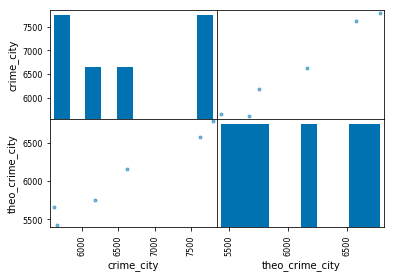

In [20]:
pd.scatter_matrix(city_df)

In [21]:
sp.stats.f_oneway(theo_crime_city, crime_city)

F_onewayResult(statistic=1.3582785854799111, pvalue=0.27088211951495406)

In [22]:
sp.stats.wilcoxon(crime_city, theo_crime_city)

C:\Users\Lauren\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=1.0, pvalue=0.046399461870904594)